In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
data = {
    'ID Producto': [1455, 2879, 3453, 4489, 5456, 6864, 2254, 3544, 21650, 2155, 5488, 4654, 3212, 212, 455, 789, 645, 6546, 3118, 3541],
    'Nombre Producto': ['Apache160', 'Apache200', 'Apache310RTR', 'Apache310RR', 'NKD', 'NS160', 'NS200', 'NS125', 'BMWs100RR', 'CR4', 'CR5', 'BWS', 'Cripton125', 'Flex125', 'CBR250', 'CBR1000', 'MT09', 'MT15', 'R15', 'R1'],
    'Tienda': ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4', 'Tienda5', 'Tienda6', 'Tienda7', 'Tienda8', 'Tienda9', 'Tienda10', 'Tienda1', 'Tienda2', 'Tienda3', 'Tienda4', 'Tienda5', 'Tienda6', 'Tienda7', 'Tienda8', 'Tienda9', 'Tienda10'],
    'Ventas del Producto': [22, 11, 25, 35, 54, 54, 45, 15, 12, 55, 30, 25, 15, 52, 32, 25, 65, 89, 22, 58],
    'Precio de venta': [15000, 265984, 651191, 984984, 98949, 49561, 51651, 54654, 65554, 65454, 46426, 544661, 321321, 5165, 65161, 4654, 6546545, 654654, 4654, 15122],
    'Fecha de venta': ['03/08/2024', '12/08/2024', '21/08/2024', '20/08/2024', '06/12/2024', '03/09/2024', '05/04/2024', '06/04/2024', '09/02/2024', '01/05/2024', '03/05/2024', '03/06/2024', '23/10/2024', '31/12/2024', '03/11/2024', '26/08/2024', '03/09/2024', '13/08/2024', '14/02/2024', '02/08/2024']
}

In [11]:

# Crear DataFrame
df = pd.DataFrame(data)

In [13]:

# Limpiar datos - corregir formato de fecha
df['Fecha de venta'] = pd.to_datetime(df['Fecha de venta'], format='%d/%m/%Y', errors='coerce')


In [17]:

# Reemplazar NaN en fechas incorrectas
df['Fecha de venta'] = df['Fecha de venta'].fillna('Fecha inválida')


In [19]:
#Mostrar DataFrame limpio
print(df)

    ID Producto Nombre Producto    Tienda  Ventas del Producto  \
0          1455       Apache160   Tienda1                   22   
1          2879       Apache200   Tienda2                   11   
2          3453    Apache310RTR   Tienda3                   25   
3          4489     Apache310RR   Tienda4                   35   
4          5456             NKD   Tienda5                   54   
5          6864           NS160   Tienda6                   54   
6          2254           NS200   Tienda7                   45   
7          3544           NS125   Tienda8                   15   
8         21650       BMWs100RR   Tienda9                   12   
9          2155             CR4  Tienda10                   55   
10         5488             CR5   Tienda1                   30   
11         4654             BWS   Tienda2                   25   
12         3212      Cripton125   Tienda3                   15   
13          212         Flex125   Tienda4                   52   
14        

In [21]:
# Resumen estadístico básico
print("\nResumen estadístico:\n")
print(df.describe(include='all'))



Resumen estadístico:

         ID Producto Nombre Producto   Tienda  Ventas del Producto  \
count      20.000000              20       20             20.00000   
unique           NaN              20       10                  NaN   
top              NaN       Apache160  Tienda1                  NaN   
freq             NaN               1        2                  NaN   
mean     4142.950000             NaN      NaN             37.05000   
min       212.000000             NaN      NaN             11.00000   
25%      1980.000000             NaN      NaN             22.00000   
50%      3332.500000             NaN      NaN             31.00000   
75%      4854.500000             NaN      NaN             54.00000   
max     21650.000000             NaN      NaN             89.00000   
std      4562.921219             NaN      NaN             20.96231   

        Precio de venta       Fecha de venta  
count      2.000000e+01                   20  
unique              NaN                  N

In [23]:
# Análisis de ventas por tienda
ventas_por_tienda = df.groupby('Tienda')['Ventas del Producto'].sum()
print("\nVentas totales por tienda:\n")
print(ventas_por_tienda)


Ventas totales por tienda:

Tienda
Tienda1      52
Tienda10    113
Tienda2      36
Tienda3      40
Tienda4      87
Tienda5      86
Tienda6      79
Tienda7     110
Tienda8     104
Tienda9      34
Name: Ventas del Producto, dtype: int64


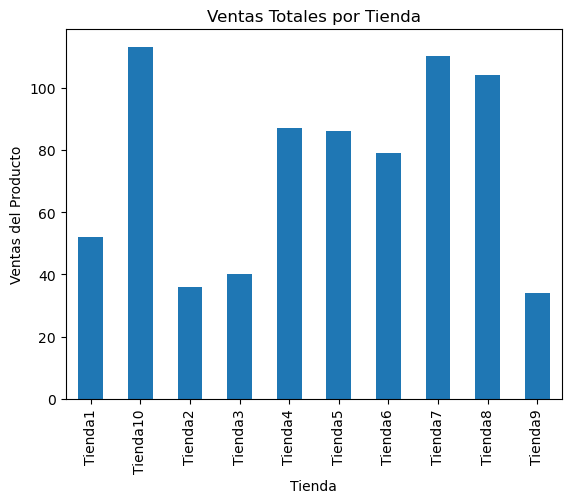

In [25]:
# Gráfica de ventas por tienda
ventas_por_tienda.plot(kind='bar', title='Ventas Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas del Producto')
plt.show()

In [27]:
# Análisis de ventas por producto
ventas_por_producto = df.groupby('Nombre Producto')['Ventas del Producto'].sum()
print("\nVentas totales por producto:\n")
print(ventas_por_producto)


Ventas totales por producto:

Nombre Producto
Apache160       22
Apache200       11
Apache310RR     35
Apache310RTR    25
BMWs100RR       12
BWS             25
CBR1000         25
CBR250          32
CR4             55
CR5             30
Cripton125      15
Flex125         52
MT09            65
MT15            89
NKD             54
NS125           15
NS160           54
NS200           45
R1              58
R15             22
Name: Ventas del Producto, dtype: int64


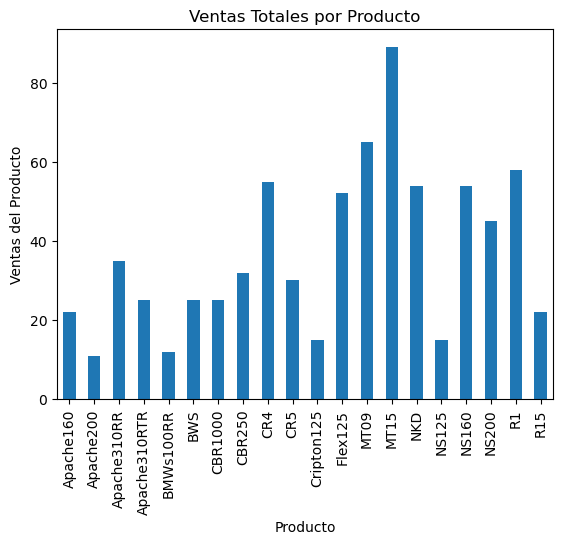

In [29]:
# Gráfica de ventas por producto
ventas_por_producto.plot(kind='bar', title='Ventas Totales por Producto')
plt.xlabel('Producto')
plt.ylabel('Ventas del Producto')
plt.show()

In [31]:
df['Ingresos'] = df['Ventas del Producto'] * df['Precio de venta']
ingresos_por_producto = df.groupby('Nombre Producto')['Ingresos'].sum()
print("\nIngresos totales por producto:\n")
print(ingresos_por_producto)



Ingresos totales por producto:

Nombre Producto
Apache160          330000
Apache200         2925824
Apache310RR      34474440
Apache310RTR     16279775
BMWs100RR          786648
BWS              13616525
CBR1000            116350
CBR250            2085152
CR4               3599970
CR5               1392780
Cripton125        4819815
Flex125            268580
MT09            425525425
MT15             58264206
NKD               5343246
NS125              819810
NS160             2676294
NS200             2324295
R1                 877076
R15                102388
Name: Ingresos, dtype: int64


In [33]:
df['Mes'] = df['Fecha de venta'].dt.month
ventas_por_mes = df.groupby('Mes')['Ventas del Producto'].sum()
ingresos_por_mes = df.groupby('Mes')['Ingresos'].sum()

print("\nVentas totales por mes:\n")
print(ventas_por_mes)
print("\nIngresos totales por mes:\n")
print(ingresos_por_mes)



Ventas totales por mes:

Mes
2      34
4      60
5      85
6      25
8     265
9     119
10     15
11     32
12    106
Name: Ventas del Producto, dtype: int64

Ingresos totales por mes:

Mes
2        889036
4       3144105
5       4992750
6      13616525
8     113267671
9     428201719
10      4819815
11      2085152
12      5611826
Name: Ingresos, dtype: int64
